<a href="https://colab.research.google.com/github/GAK1729/Kaggle-FIRE-Dataset/blob/master/Asok_Kumar_Gaurav_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set From Kaggle

## [Kaggle Fire Data Set](https://www.kaggle.com/phylake1337/fire-dataset)


# Description

## Context

The dataset was created by my team during the NASA Space Apps Challenge in 2018, the goal was using the dataset to develop a model that can recognize the images with fire.
If you seek more info about the Context or the challenge, then you can visit Our team page.

## Content

Data was collected to train a model to distinguish between the images that contain fire (fire images) and regular images (non-fire images), so the whole problem was binary classification.

Data is divided into 2 folders, fireimages folder contains 755 outdoor-fire images some of them contains heavy smoke, the other one is non-fireimages which contain 244 nature images (eg: forest, tree, grass, river, people, foggy forest, lake, animal, road, and waterfall).

Hint: Data is skewed, which means the 2 classes(folders) doesn't have an equal number of samples, so make sure that you have a validation set with an equally-sized number of images per class (eg: 40 images of both fire and non-fire classes).

# Setup

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Data Cleaning

## Sample Image Display

### Fire Image

To View an image from Fire Data set, Please enter an integer number between 1 and 755 (1 <= num <= 755)  :
2
uint8
(960, 1440, 3)


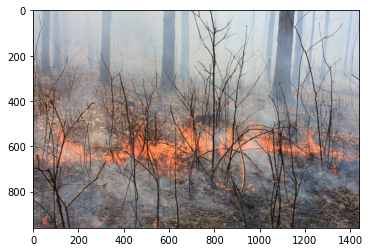

In [201]:
from matplotlib import image
from matplotlib import pyplot

print("To View an image from Fire Data set, Please enter an integer number between 1 and 755 (1 <= num <= 755)  :")
fire_num = str(input())

# load image as pixel array
image1 = image.imread('gdrive/My Drive/Data/Fire Detection/fire_dataset/fire_images/fire.'+fire_num+'.png', 0)
# summarize shape of the pixel array
print(image1.dtype)
print(image1.shape)
# display the array of pixels as an image
pyplot.imshow(image1)
pyplot.show()

### Non-Fire Image

To View an image from Non Fire Data set, Please enter an integer number between 1 and 244 (1 <= num <= 244)  :
32
uint8
(500, 1170, 3)


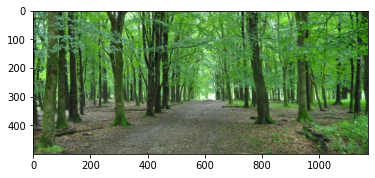

In [202]:
print("To View an image from Non Fire Data set, Please enter an integer number between 1 and 244 (1 <= num <= 244)  :")
non_fire_num = str(input())

# load image as pixel array
image1 = image.imread('gdrive/My Drive/Data/Fire Detection/fire_dataset/non_fire_images/non_fire.'+non_fire_num+'.png', 0)
# summarize shape of the pixel array
print(image1.dtype)
print(image1.shape)
# display the array of pixels as an image
pyplot.imshow(image1)
pyplot.show()

## Image Processing

## Converting PNG Images to numpy Arrays of Shape (300, 300, 3)

In [3]:
import os

In [203]:
fi_fnlist = os.listdir('gdrive/My Drive/Data/Fire Detection/fire_dataset/fire_images/')
nfi_fnlist = os.listdir('gdrive/My Drive/Data/Fire Detection/fire_dataset/non_fire_images/')
type(nfi_fnlist)

list

In [21]:
from matplotlib import image
from matplotlib import pyplot
import os 
import cv2
import numpy as np

image_list = []
dim_tup = (300, 300)

print("Converting PNG Images to numpy Arrays of Shape (300, 300, 3)")
print()
print("___________________________STARTING FIRE IMAGES____________________________________________")

len_fi_fnlist = len(fi_fnlist)
file_num = 1
for fn in fi_fnlist:
  if(file_num%50 == 0):
    print(f"{file_num}/{len_fi_fnlist} Completed ...")
  np_image = image.imread('gdrive/My Drive/Data/Fire Detection/fire_dataset/fire_images/fire.'+str(file_num)+'.png', 0)
  resized_image = cv2.resize(np_image, dsize= dim_tup, interpolation=cv2.INTER_CUBIC)

  if len(resized_image.shape) > 2 and resized_image.shape[2] == 4:
    #convert the image from RGBA2RGB
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGRA2BGR)

  temp = (resized_image, True)
  image_list.append(temp)
  file_num += 1

print("___________________________STARTING NON-FIRE IMAGES____________________________________________")

file_num = 1
len_nfi_fnlist = len(nfi_fnlist)

for fn in nfi_fnlist:
  if(file_num%50 == 0):
    print(f"{file_num}/{len_nfi_fnlist} Completed ...")
  np_image = image.imread('gdrive/My Drive/Data/Fire Detection/fire_dataset/non_fire_images/non_fire.'+str(file_num)+'.png', 0)
  resized_image = cv2.resize(np_image, dsize= dim_tup, interpolation=cv2.INTER_CUBIC)
  
  if len(resized_image.shape) > 2 and resized_image.shape[2] == 4:
    #convert the image from RGBA2RGB
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGRA2BGR)

  # image_tup = image_tup + (np_image, True)
  temp = (resized_image, False)
  image_list.append(temp)
  file_num += 1
print()
print("Process COMPLETED")

Converting PNG Images to numpy Arrays of Shape (300, 300, 3)

___________________________STARTING FIRE IMAGES____________________________________________
50/755 Completed ...
100/755 Completed ...
150/755 Completed ...
200/755 Completed ...
250/755 Completed ...
300/755 Completed ...
350/755 Completed ...
400/755 Completed ...
450/755 Completed ...
500/755 Completed ...
550/755 Completed ...
600/755 Completed ...
650/755 Completed ...
700/755 Completed ...
750/755 Completed ...
___________________________STARTING NON-FIRE IMAGES____________________________________________
50/244 Completed ...
100/244 Completed ...
150/244 Completed ...
200/244 Completed ...

Process COMPLETED


In [22]:
for i in range(10):
  print(image_list[i][1])

True
True
True
True
True
True
True
True
True
True


## Random Shuffling the Data of Fire and Non-Fire Images

In [23]:
import random

In [24]:
random.shuffle(image_list)

In [25]:
for i in range(10):
  print(image_list[i][1])

False
False
True
True
True
True
True
False
False
True


In [26]:
image_list[0][0].shape

(300, 300, 3)

## Converting Ouput data to one-hot Output 

In [27]:
output_list = []
for tup in image_list:
  if (tup[1]):
    output_list.append([1, 0])
  else:
    output_list.append([0, 1])

In [28]:
output_list[0]

[0, 1]

In [29]:
onehot_np = np.array(output_list)

In [30]:
onehot_np

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [31]:
im_tups = ()
for tup in image_list:
  im_tups = im_tups + (tup[0], )

In [32]:
all_images = np.stack(im_tups, axis=0)

## Saving Data in pickle file

In [ ]:
import pickle

In [ ]:
# with open('gdrive/My Drive/saved_models/all_images.pickle', 'wb') as f:
#     pickle.dump(all_images, f)

In [ ]:
# with open('gdrive/My Drive/saved_models/onehot_np.pickle', 'wb') as f:
#     pickle.dump(onehot_np, f)

## Total 999 Images. Dividing into 

*   700 Train Images
*   200 Validation Images
*   99 Test Images

In [33]:
all_images.shape

(999, 300, 300, 3)

In [34]:
all_images = all_images /255.0

In [35]:
train_images = all_images[:700]
val_images = all_images[700:900]
test_images = all_images[900:]

train_result = onehot_np[:700]
val_result = onehot_np[700:900]
test_result = onehot_np[900:]

In [38]:
train_images.shape

(700, 300, 300, 3)

In [39]:
onehot_np.shape

(999, 2)

# Deep Convolutional Neural Network Model

In [40]:
model= models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.3))
   
model.add(layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(2, activation='sigmoid'))

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout
from keras.utils import np_utils

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 128)       0

# Training

In [52]:
history = model.fit(train_images, train_result, epochs=4, batch_size=75,validation_data=(val_images, val_result))

Epoch 1/4
10/10 [==============================] - 1s 142ms/step - loss: 0.0876 - accuracy: 0.9757 - val_loss: 0.1672 - val_accuracy: 0.9350
Epoch 2/4
10/10 [==============================] - 1s 134ms/step - loss: 0.0581 - accuracy: 0.9786 - val_loss: 0.1173 - val_accuracy: 0.9700
Epoch 3/4
10/10 [==============================] - 1s 134ms/step - loss: 0.0451 - accuracy: 0.9843 - val_loss: 0.1178 - val_accuracy: 0.9750
Epoch 4/4
10/10 [==============================] - 1s 131ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.1450 - val_accuracy: 0.9700


### Saving Model and Weights

In [ ]:
# jsonmodel=model.to_json()
# # with open('gdrive/My Drive/saved_models/model_1.json', "w") as json_file:
# # 		json_file.write(jsonmodel)
  
# # model.save_weights('gdrive/My Drive/saved_models/model_weights_1.h5')

## Validation Accuracy of 97% with batch size of 75 and 4 epochs

# Predicting

In [197]:
predictions = model.predict_classes(test_images)

In [68]:
import pandas as pd

In [69]:
test_dict = {"Image Number": [], "Prediction Class": [], "True Class": [], "Accuracy": []}
i = 0
for pr in list(predictions):
  if (pr==0):
    test_dict["Image Number"].append(i)
    test_dict["Prediction Class"].append("Fire")
    if (list(test_result[i]) == [1, 0]):
      test_dict["True Class"].append("Fire")
      test_dict["Accuracy"].append(True)
    else:
      test_dict["True Class"].append("Non-Fire")
      test_dict["Accuracy"].append(False)
  else:
    test_dict["Image Number"].append(i)
    test_dict["Prediction Class"].append("Non-Fire")
    if (list(test_result[i]) == [1, 0]):
      test_dict["True Class"].append("Fire")
      test_dict["Accuracy"].append(False)
    else:
      test_dict["True Class"].append("Non-Fire")
      test_dict["Accuracy"].append(True)
  i += 1

In [70]:
testDF = pd.DataFrame(test_dict) 

## Data frame Summarising the Test Data Prediction results

In [71]:
testDF

,Image Number,Prediction Class,True Class,Accuracy
0,0,Fire,Fire,True
1,1,Fire,Fire,True
2,2,Fire,Fire,True
3,3,Fire,Fire,True
4,4,Fire,Fire,True
...,...,...,...,...
94,94,Fire,Fire,True
95,95,Non-Fire,Non-Fire,True
96,96,Non-Fire,Non-Fire,True
97,97,Fire,Fire,True


## Correct Image Classification Data Frame

In [86]:
correct_testDF = testDF.loc[testDF["Accuracy"] == True]
correct_testDF = correct_testDF.reset_index(drop=True)

In [87]:
correct_testDF.loc

,Image Number,Prediction Class,True Class,Accuracy
0,0,Fire,Fire,True
1,1,Fire,Fire,True
2,2,Fire,Fire,True
3,3,Fire,Fire,True
4,4,Fire,Fire,True
...,...,...,...,...
90,94,Fire,Fire,True
91,95,Non-Fire,Non-Fire,True
92,96,Non-Fire,Non-Fire,True
93,97,Fire,Fire,True


## Wrong Image Classification Data Frame

In [101]:
wrong_testDF = testDF.loc[testDF["Accuracy"] == False]
wrong_testDF = wrong_testDF.reset_index(drop=True)

In [102]:
wrong_testDF

,Image Number,Prediction Class,True Class,Accuracy
0,16,Fire,Non-Fire,False
1,29,Non-Fire,Fire,False
2,56,Fire,Non-Fire,False
3,66,Fire,Non-Fire,False


# Test Result Accuracy and Visualization

In [90]:
print(f"Test Accuracy = {round(100*(len(correct_testDF)/len(testDF)), 2)}%")

Test Accuracy = 95.96%


``

In [170]:
pf_tf = 0
pn_tn = 0
pf_tn = 0
pn_tf = 0
for pred, tru in zip(list(testDF.to_dict('dict')["Prediction Class"].values()), list(testDF.to_dict('dict')["True Class"].values())):
  if (tru == "Fire" and pred == "Fire"):
    pf_tf += 1
  elif (tru == "Non-Fire" and pred == "Non-Fire"):
    pn_tn += 1
  elif (pred == "Fire" and tru == "Non-Fire"):
    pf_tn += 1 
  elif (tru == "Fire" and pred == "Non-Fire"):
    pn_tf += 1
cf_matrix = np.array([[pf_tf,  pf_tn], [ pn_tf, pn_tn]])

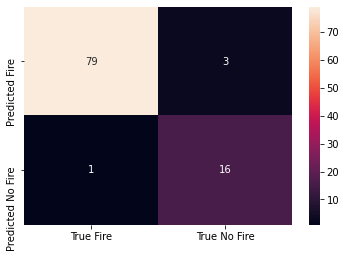

In [148]:
import seaborn as sns
y_axis_labels = ["Predicted Fire","Predicted No Fire"]
x_axis_labels = ["True Fire","True No Fire"]
sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True)

In [192]:
def predict_this_image():
  print("To View an image from Non Fire Data set, Please enter an integer number between 0 and 98 (0 <= num <= 98)  :")
  test_num = int(input())

  image1 = test_images[test_num]

  print(f"Predicted Class = {list(testDF.to_dict('dict')['Prediction Class'].values())[test_num]}")
  print(f"True Class = {list(testDF.to_dict('dict')['True Class'].values())[test_num]}")
  if (list(testDF.to_dict('dict')['Prediction Class'].values())[test_num] == list(testDF.to_dict('dict')['True Class'].values())[test_num]):
    print("Accurate Prediction :)")
  else:
    print("Wrong Prediction :(")
  # display the array of pixels as an image
  pyplot.imshow(image1)
  pyplot.show()

To View an image from Non Fire Data set, Please enter an integer number between 0 and 98 (0 <= num <= 98)  :
23
Predicted Class = Non-Fire
True Class = Non-Fire
Accurate Prediction :)


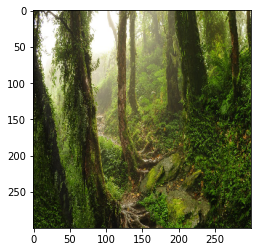

In [193]:
predict_this_image()

To View an image from Non Fire Data set, Please enter an integer number between 0 and 98 (0 <= num <= 98)  :
0
Predicted Class = Fire
True Class = Fire
Accurate Prediction :)


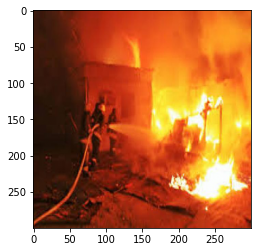

In [194]:
predict_this_image()

To View an image from Non Fire Data set, Please enter an integer number between 0 and 98 (0 <= num <= 98)  :
66
Predicted Class = Fire
True Class = Non-Fire
Wrong Prediction :(


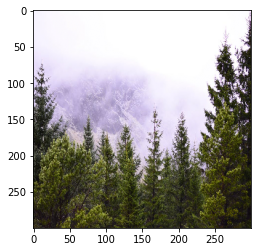

In [195]:
predict_this_image()

To View an image from Non Fire Data set, Please enter an integer number between 0 and 98 (0 <= num <= 98)  :
29
Predicted Class = Non-Fire
True Class = Fire
Wrong Prediction :(


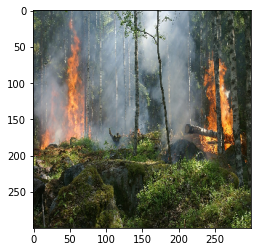

In [196]:
predict_this_image()